Context:
Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever

In [1]:
#importing data and library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
import plotly.express as px

In [3]:
#monthly and yearly data

In [4]:
data = pd.read_csv(r"C:\Users\adity\Desktop\PROJECT\The Discovery of Handwashing\yearly_deaths_by_clinic.csv")

In [5]:
data2 = pd.read_csv(r"C:\Users\adity\Desktop\PROJECT\The Discovery of Handwashing\monthly_deaths.csv")

In [6]:
data.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [7]:
data2.head()

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2

Exploratory Data Analysis (EDA)


What is the dimension of data?
How many rows and columns?
What are the column names?
Which month are included in the dataset?
Are there any NaN values or duplicates?
average number of births that took place per month?
average number of deaths that took place per month?

In [8]:
print("dimension of yearly data: ",data.shape)
data

dimension of yearly data:  (12, 4)


year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [9]:
print("dimension of monthly data: ",data2.shape)
data2

dimension of monthly data:  (98, 3)


date  births  deaths
0   1841-01-01     254      37
1   1841-02-01     239      18
2   1841-03-01     277      12
3   1841-04-01     255       4
4   1841-05-01     255       2
..         ...     ...     ...
93  1848-11-01     310       9
94  1848-12-01     373       5
95  1849-01-01     403       9
96  1849-02-01     389      12
97  1849-03-01     406      20

[98 rows x 3 columns]

In [10]:
data.info()#to check null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [12]:
print(f'Any duplicates in yearly data? {data.duplicated().values.any()}')

Any duplicates in yearly data? False


In [13]:
print(f'Any duplicates in monthly data? {data2.duplicated().values.any()}')

Any duplicates in monthly data? False


# yearly

In [14]:
#Descriptive Statistics
data.describe()

year       births      deaths
count    12.000000    12.000000   12.000000
mean   1843.500000  3152.750000  223.333333
std       1.783765   449.078476  145.383089
min    1841.000000  2442.000000   66.000000
25%    1842.000000  2901.750000  100.250000
50%    1843.500000  3108.500000  219.500000
75%    1845.000000  3338.250000  263.500000
max    1846.000000  4010.000000  518.000000

# monthly


In [15]:
data2.describe()

births     deaths
count   98.000000  98.000000
mean   267.000000  22.469388
std     41.769372  18.141031
min    190.000000   0.000000
25%    242.500000   8.000000
50%    264.000000  16.500000
75%    292.750000  36.750000
max    406.000000  75.000000

In [16]:
# Percentage of Women Dying in Childbirth
prob = data.deaths.sum() / data.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# plotting total number of birth to death over time

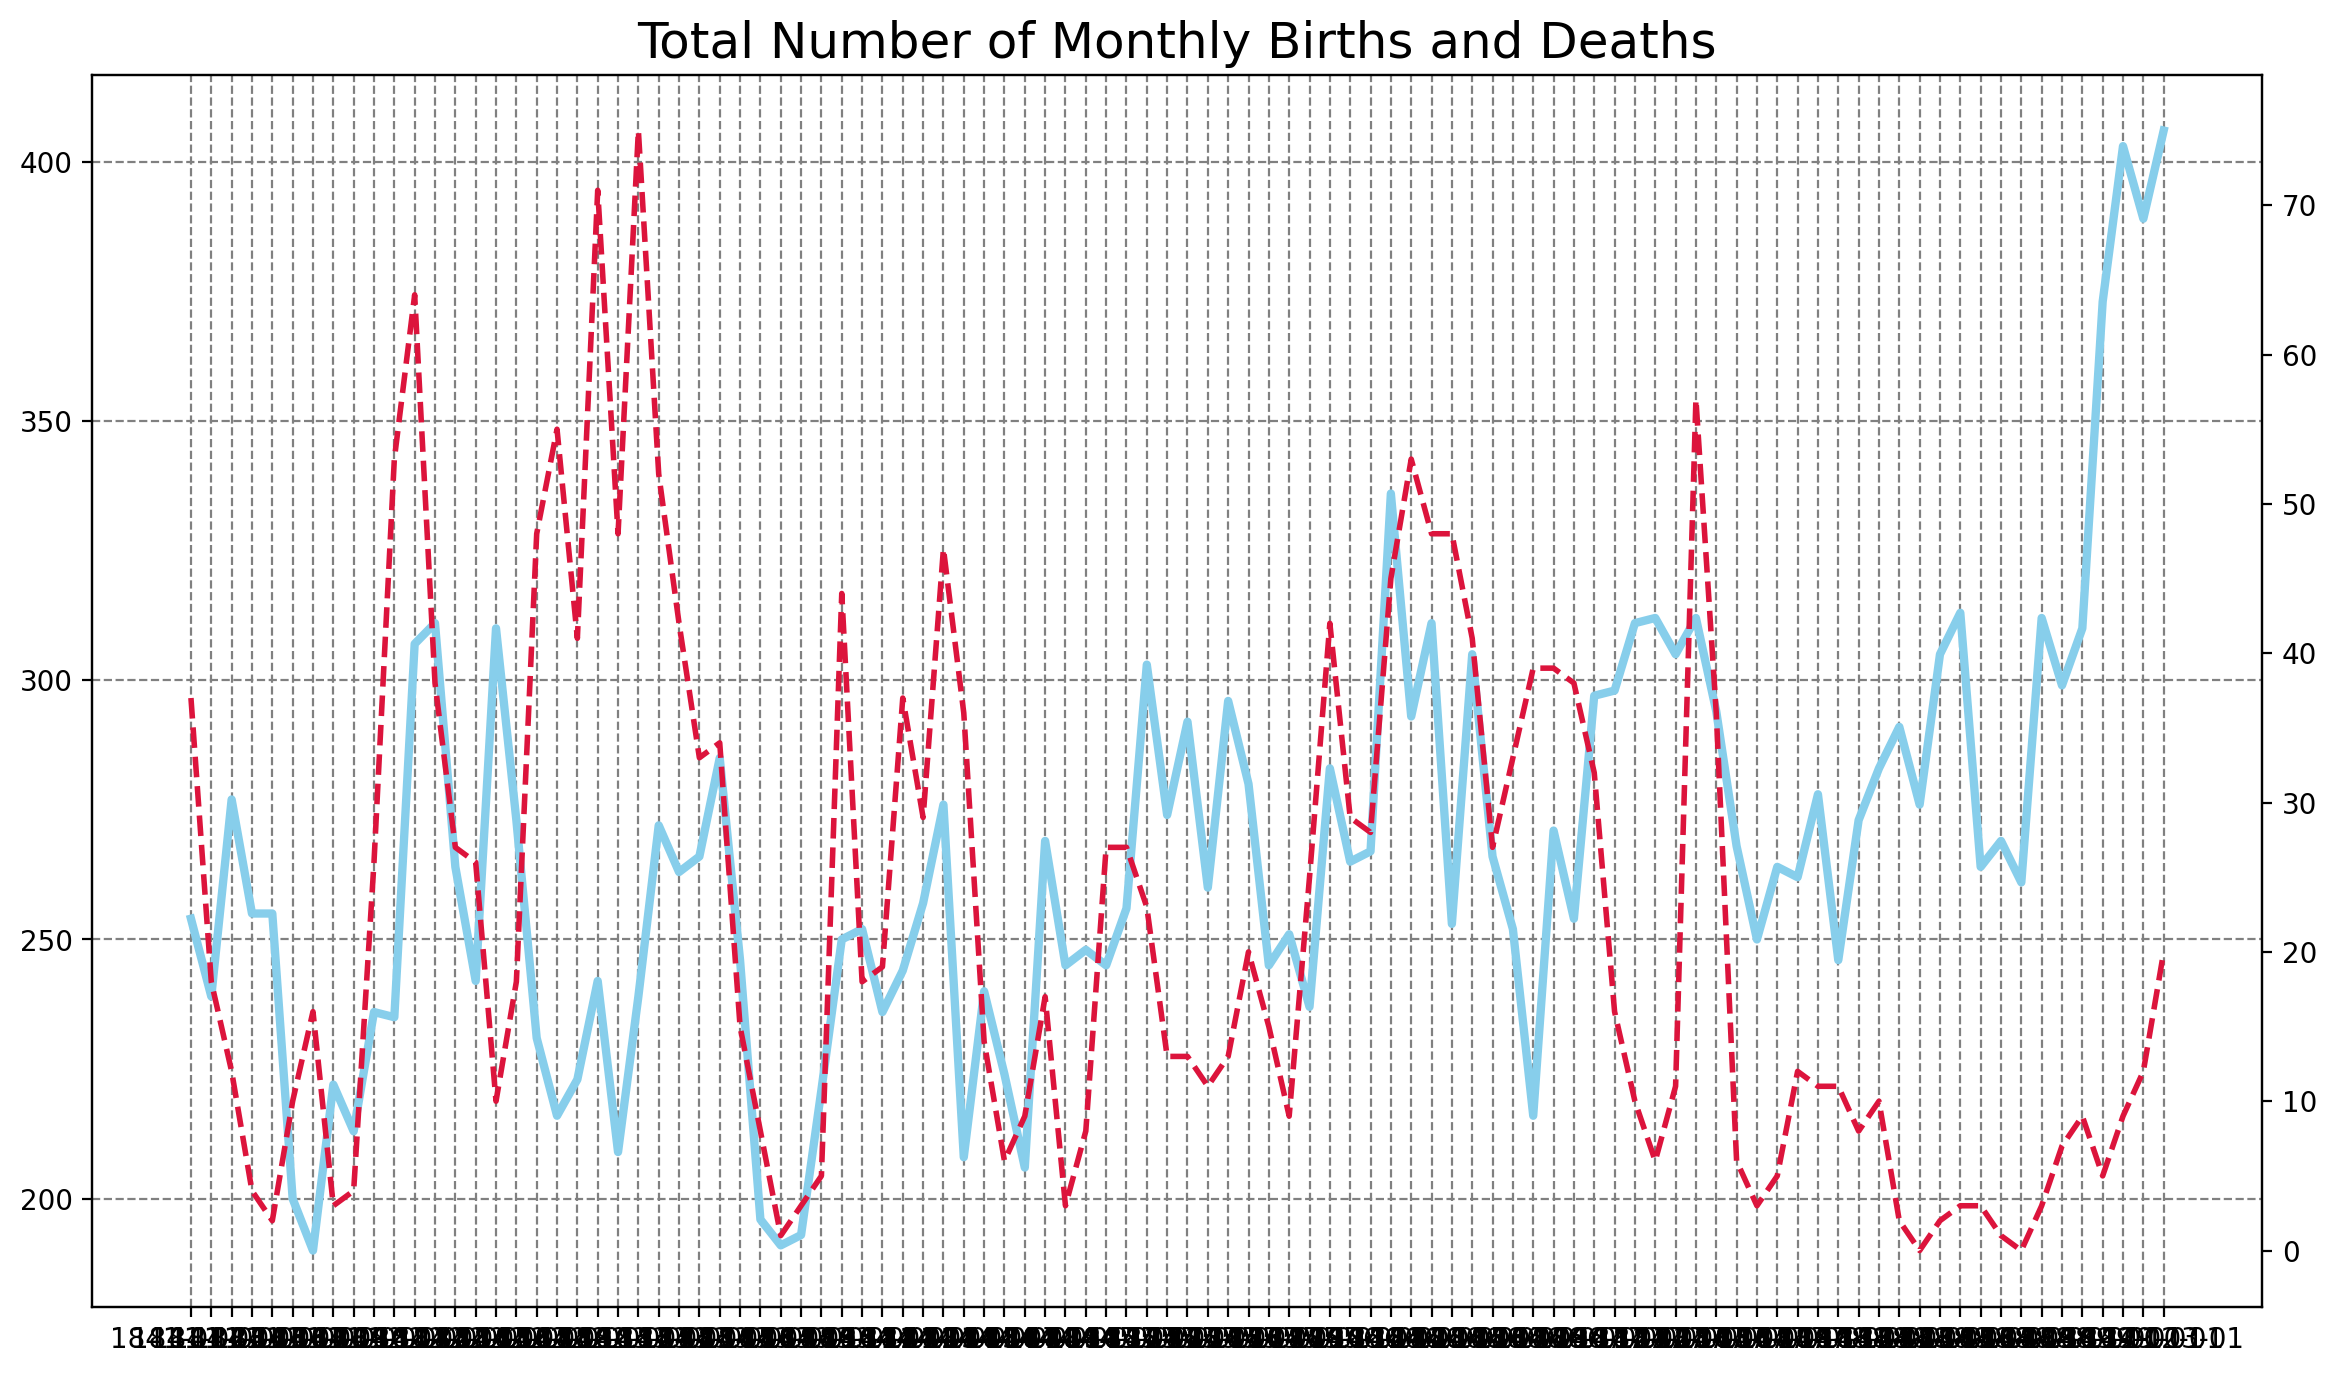

In [17]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
        
ax1 = plt.gca() 
ax2 = ax1.twinx()
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(data2.date, 
         data2.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(data2.date, 
         data2.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

# Yearly data split by clinic


In [18]:
#discuss with someone

In [19]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

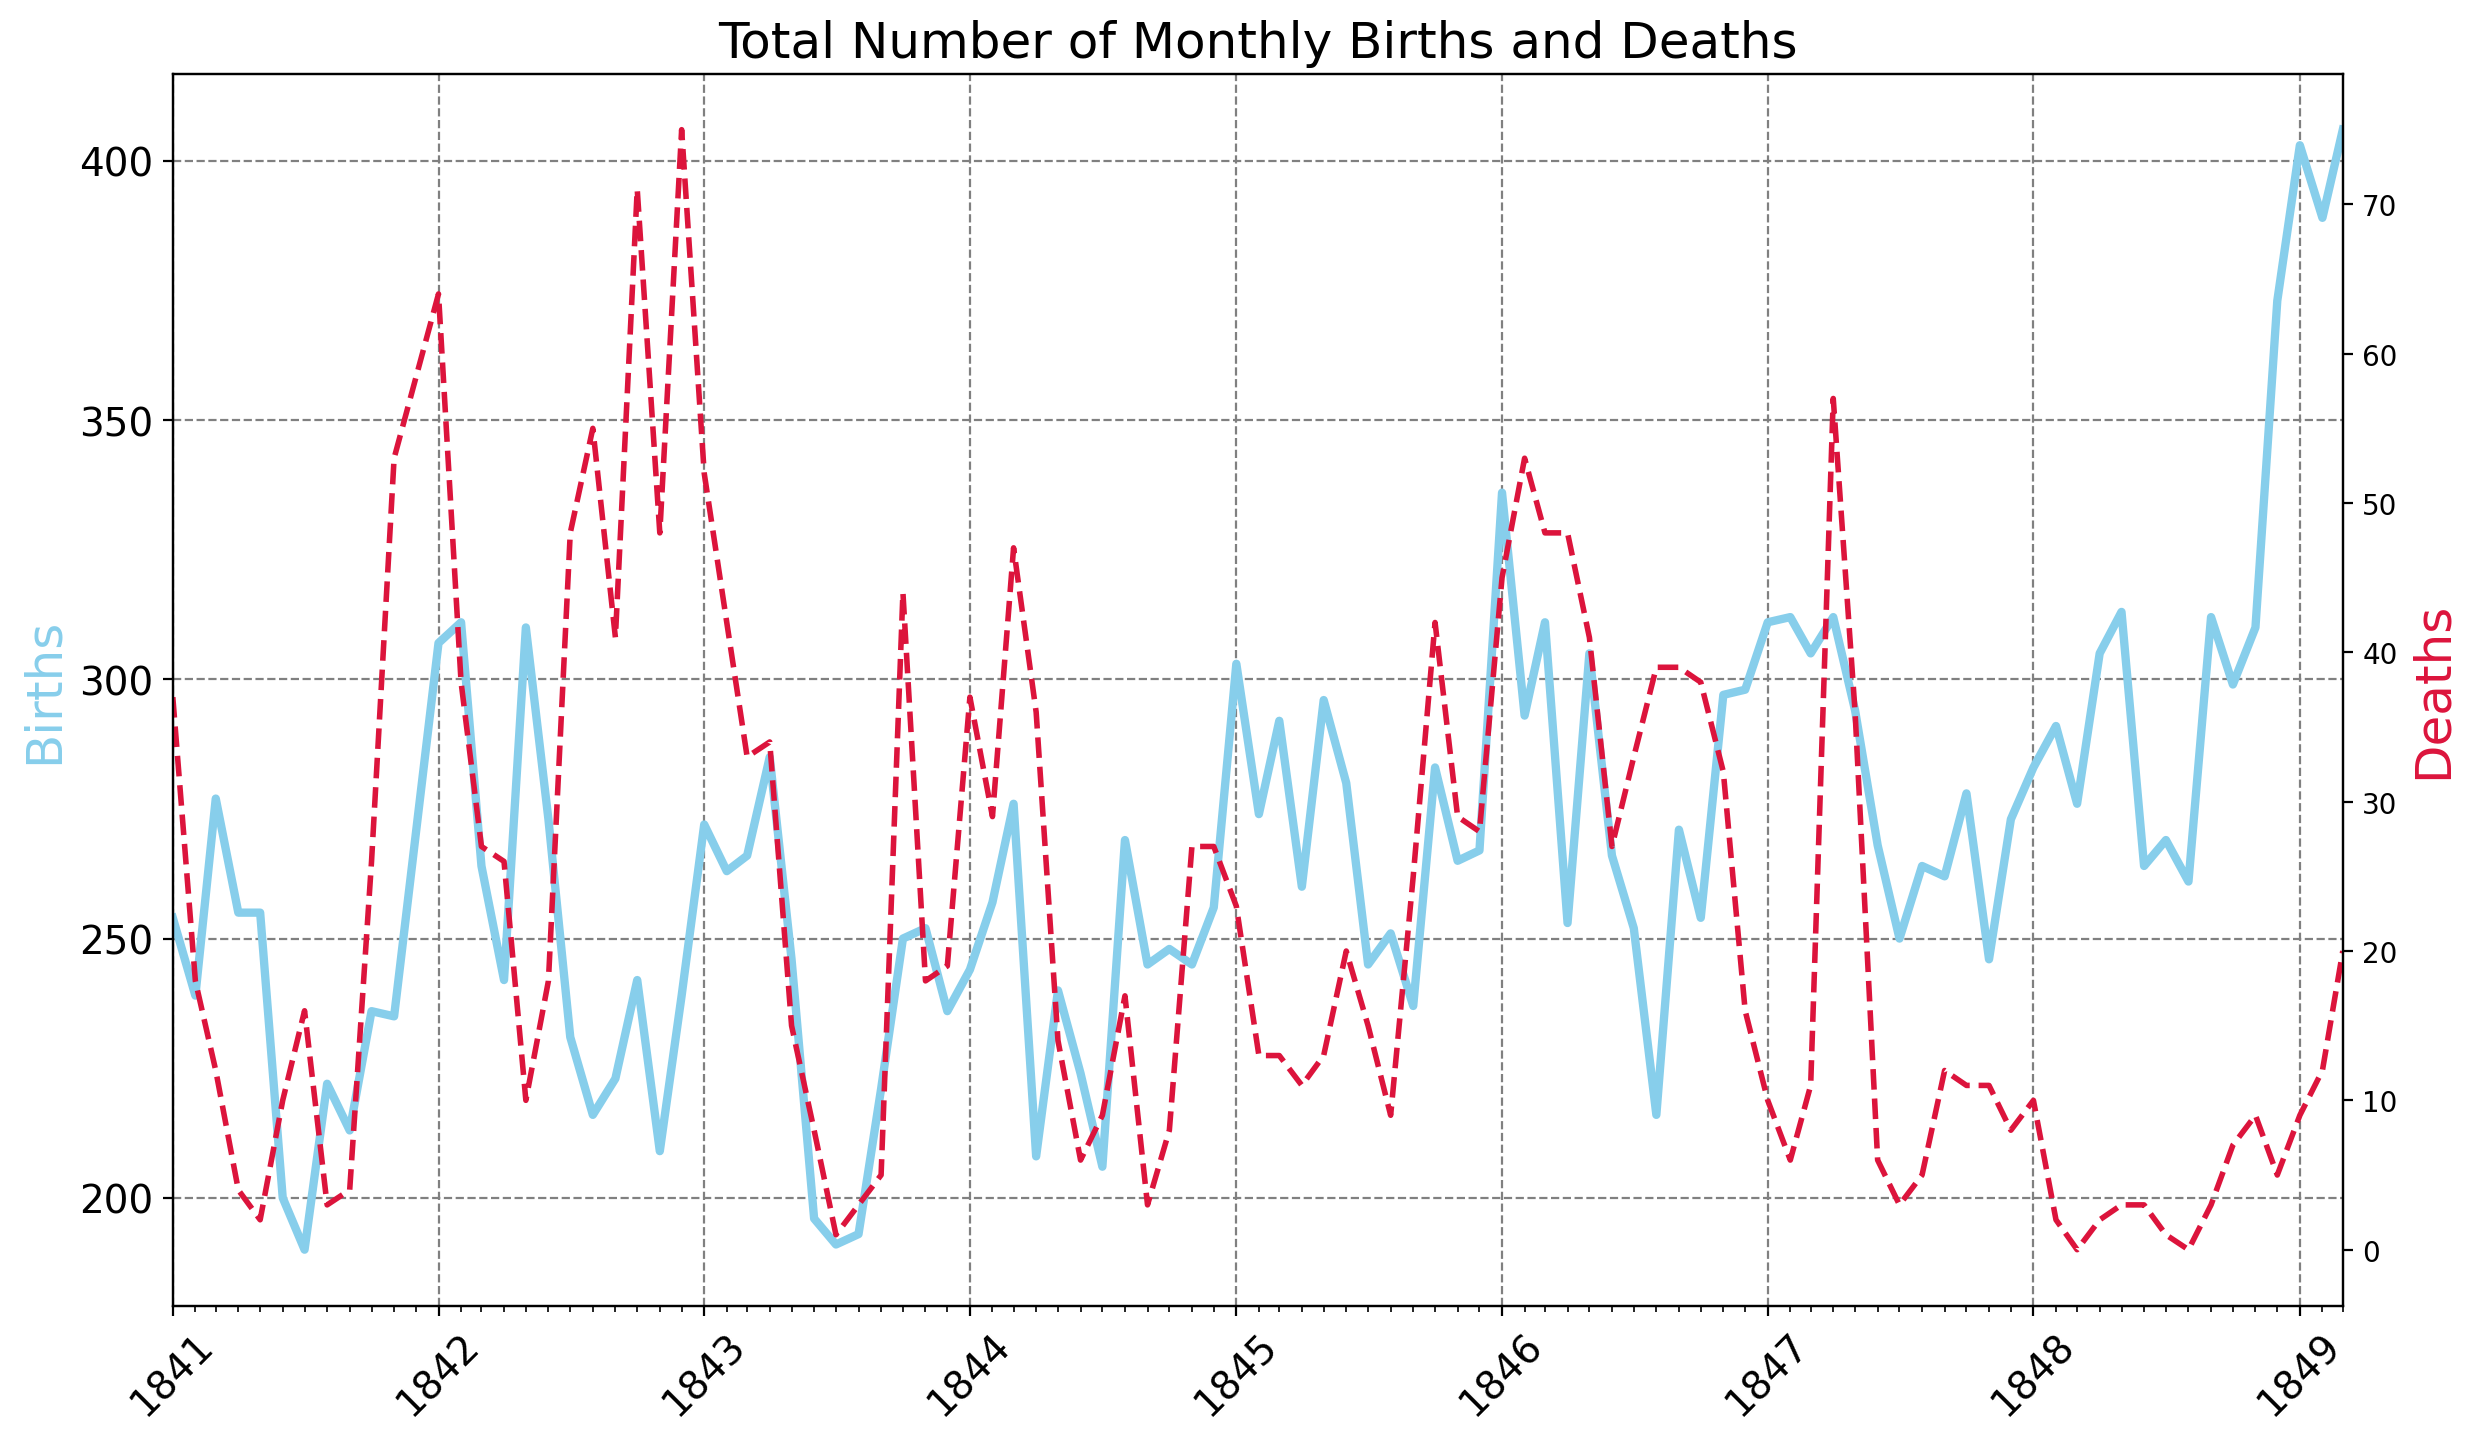

In [20]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

data2['date'] = pd.to_datetime(data2['date'])

ax1.set_xlim([data2.date.min(), data2.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')
 
ax1.plot(data2.date, 
         data2.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(data2.date, 
         data2.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

# The Births Split by Clinic


In [21]:
line = px.line(data, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

# Total deaths by clinic


In [22]:
line = px.line(data, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

# Calculate the Proportion of Deaths at Each Clinic

In [23]:
data['pct_deaths'] = data.deaths / data.births
data.head()

year  births  deaths    clinic  pct_deaths
0  1841    3036     237  clinic 1    0.078063
1  1842    3287     518  clinic 1    0.157591
2  1843    3060     274  clinic 1    0.089542
3  1844    3157     260  clinic 1    0.082357
4  1845    3492     241  clinic 1    0.069015

In [24]:
clinic_1 = data[data.clinic == 'clinic 1']
avg_1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [25]:
clinic_2 = data[data.clinic == 'clinic 2']
avg_2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_2:.3}%.')

Average death rate in clinic 2 is 3.88%.


# Proportion Deaths by Clinic

In [26]:
line = px.line(data, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

Average death rate in clinic 1 is 9.92% while
Average death rate in clinic 2 is 3.88%.

clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

# The Effect of Handwashing

In [27]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

Add a column called "pct_deaths" to df_monthly that has the percentage of deaths per birth for each row.

Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.

In [28]:
# adding column
data2['pct_deaths'] = data2.deaths/data2.births

data2.head(98)

date  births  deaths  pct_deaths
0  1841-01-01     254      37    0.145669
1  1841-02-01     239      18    0.075314
2  1841-03-01     277      12    0.043321
3  1841-04-01     255       4    0.015686
4  1841-05-01     255       2    0.007843
..        ...     ...     ...         ...
93 1848-11-01     310       9    0.029032
94 1848-12-01     373       5    0.013405
95 1849-01-01     403       9    0.022333
96 1849-02-01     389      12    0.030848
97 1849-03-01     406      20    0.049261

[98 rows x 4 columns]

In [29]:
# Split monthly into before and after handwashing_start
intial = data2[data2.date < handwashing_start]
after = data2[data2.date >= handwashing_start]

In [30]:
bw_rate = intial.deaths.sum() / intial.births.sum() * 100
aw_rate = after.deaths.sum() / after.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


# statistical analysics

# Calculate the Difference in the Average Monthly Death Rate

In [31]:
avg_prob_before = intial.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


In [32]:
data2['washing_hands'] = np.where(data2.date < handwashing_start, 'No', 'Yes')#Feature engineering

In [33]:
hist = px.histogram(data2, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

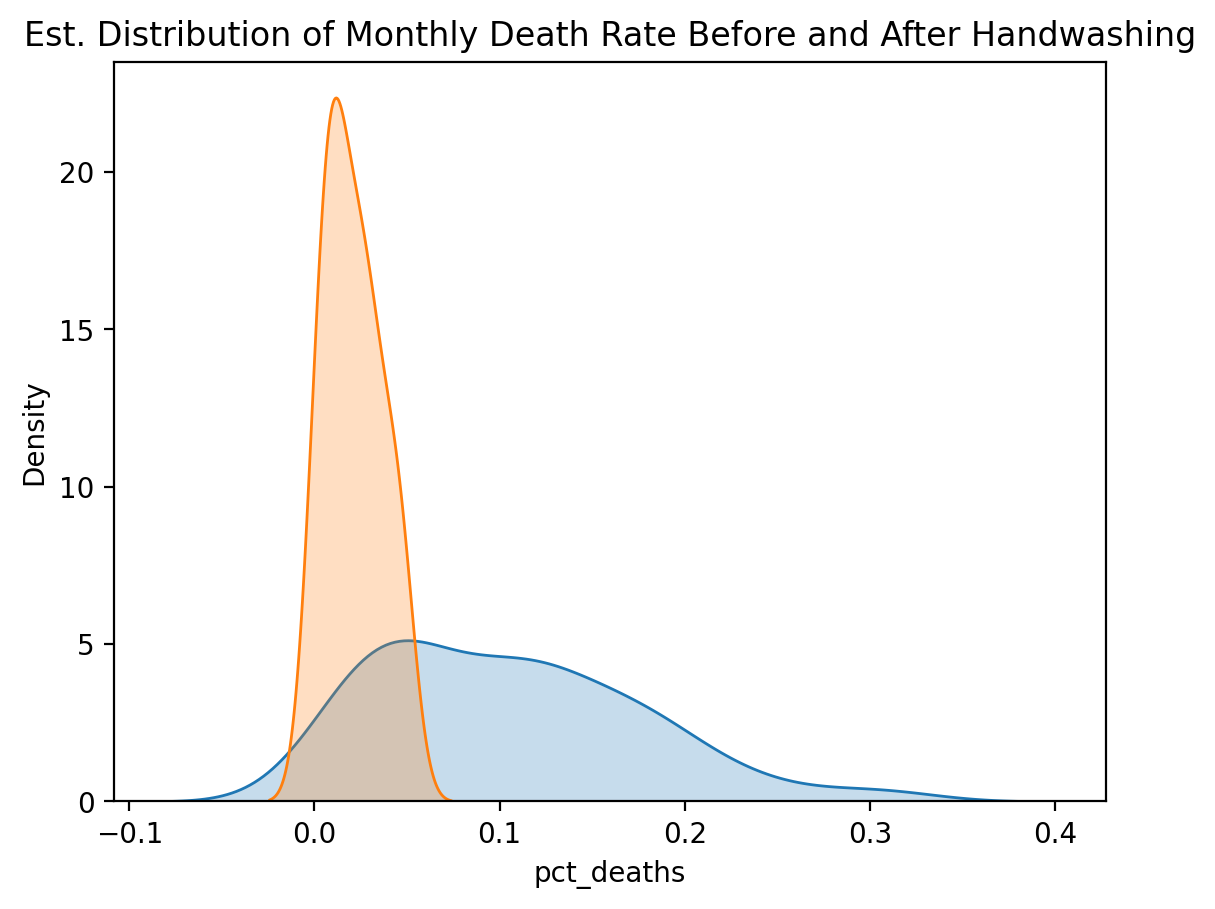

In [34]:
#Use a Kernel Density Estimate (KDE) to visualise a smooth distribution
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(intial.pct_deaths, fill=True)
sns.kdeplot(after.pct_deaths, fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

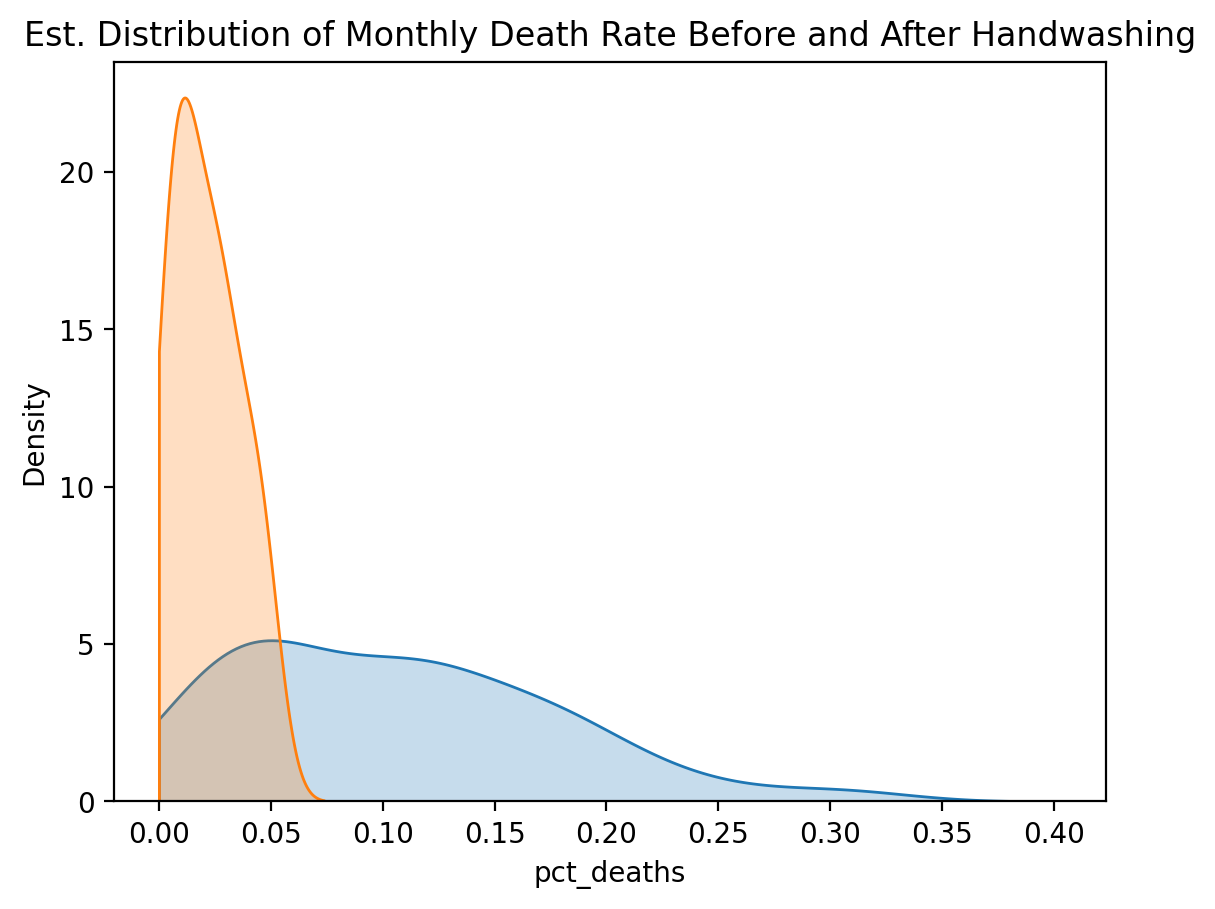

In [35]:
plt.figure(dpi=200)

sns.kdeplot(intial.pct_deaths, fill=True,clip=(0,1))
sns.kdeplot(after.pct_deaths, fill=True, clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

#  The effect of handwashing

With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

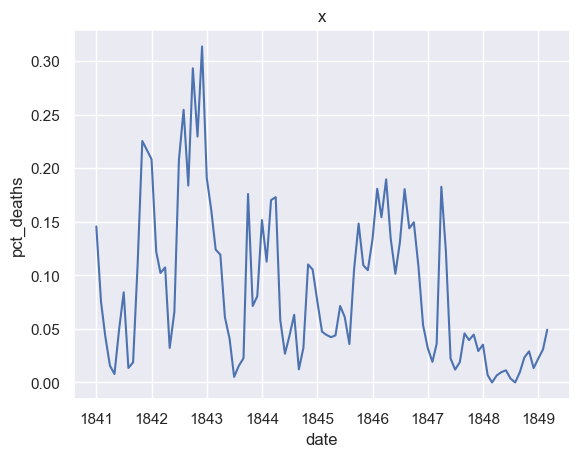

In [43]:
# Plot monthly proportion of deaths
sns.set()
sns.lineplot(x=data2['date'], y=data2['pct_deaths'])
plt.show()

# The effect of handwashing highlighted

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.

The effect of handwashing is made even more clear if we highlight this in the graph.

<Axes: xlabel='date'>

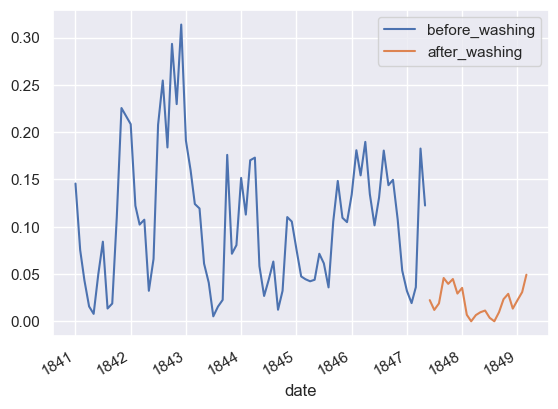

In [46]:
# Plot monthly proportion of deaths before and after handwashing
sns.set()
ax = intial.plot(x='date', y='pct_deaths', label='before_washing') 
after.plot(x='date', y='pct_deaths', label='after_washing', ax=ax)

#  More handwashing, fewer deaths?

Again, the graph shows that handwashing had a huge effect. 
How much did it reduce the monthly proportion of deaths on average?

In [54]:
print(data2.columns)


Index(['date', 'births', 'deaths', 'pct_deaths', 'washing_hands'], dtype='object')


In [57]:
# Calculating the mean proportion of deaths 
# before and after handwashing.

# Group by 'washing_hands' and calculate mean, count, and variance of 'pct_deaths'
grouped_data = data2.groupby('washing_hands')['pct_deaths'].agg(['mean', 'count', 'var']).reset_index()

# Rename the columns in the result
grouped_data.columns = ['washing_hands', 'mean_pct_deaths', 'count_pct_deaths', 'var_pct_deaths']

# Print the summary
print(grouped_data)


  washing_hands  mean_pct_deaths  count_pct_deaths  var_pct_deaths
0            No         0.105050                76        0.005003
1           Yes         0.021093                22        0.000231


# T-Test to Show Statistical Significance

In [59]:
from scipy.stats import ttest_ind


# Separate the data into two groups based on 'washing_hands'
group_no_washing = data2[data2['washing_hands'] == 'No']['pct_deaths']
group_yes_washing = data2[data2['washing_hands'] == 'Yes']['pct_deaths']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(group_no_washing, group_yes_washing, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")
The interpretation of the p-value obtained from the two-sample t-test is as follows:

"""
If the p-value is less than your chosen significance level (commonly 0.05),
you reject the null hypothesis.

If the p-value is greater than or equal to the significance level,
you accept the null hypothesis.
"""

T-Statistic: 9.610070667995197
P-Value: 1.4452771414077477e-15
The difference is statistically significant.


That the doctors didn't wash their hands increased the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

In [63]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands ='TRUE'
print(doctors_should_wash_their_hands)

TRUE
